#Assignment 3 Resubmission
**Problem 4**


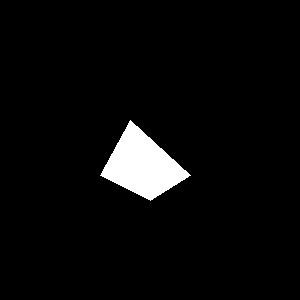

In [33]:
#Creation of quadrilateral
import PIL.ImageDraw as ImageDraw,PIL.Image as Image, PIL.ImageShow as ImageShow 
im = Image.new("RGB", (300,300))
draw = ImageDraw.Draw(im)

draw.polygon(((130,120),(100,175),(150,200),(190,175)),fill=(255,255,255))
im

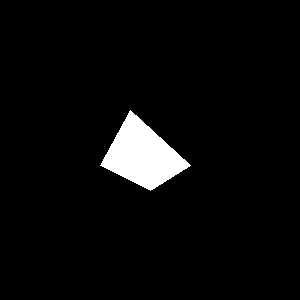

In [50]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
my_img = np.zeros((300, 300), dtype = "uint8")
#pts = np.array([[124,149],[174,129],[149,149],[174,174]], np.int32)
pts = np.array([[130,110],[100,165],[150,190],[190,165]], np.int32)
pts = pts.reshape((-1,1,2))
#cv2.polylines(my_img,[pts],True,(0,255,255))
cv2.fillPoly(my_img,[pts],(255,255,255))

cv2_imshow(my_img)
#cv2.imshow('Window', my_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

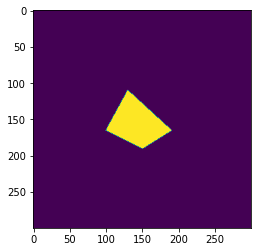

In [51]:
plt.imshow(my_img)

Translation of quadrilateral

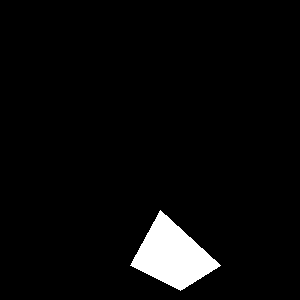

In [52]:
#Translation of quad by (30,100)
rows,cols = my_img.shape

M = np.float32([[1,0,30],[0,1,100]])
dst = cv2.warpAffine(my_img,M,(cols,rows))

cv2_imshow(dst)
#cv2.imshow('img',dst)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Rotation of quadrilateral

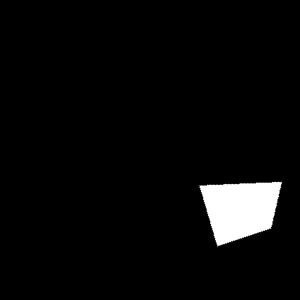

In [53]:
#rotation of image 45 deg
M1 = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
dst1 = cv2.warpAffine(dst,M1,(cols,rows))
cv2_imshow(dst1)

In [54]:
#Function to find Harris corners
def find_harris_corners(input_img, k, window_size, threshold):
    
    corner_list = []
    cl1=[]
    output_img = cv2.cvtColor(input_img.copy(), cv2.COLOR_GRAY2RGB)
    
    offset = int(window_size/2)
    y_range = input_img.shape[0] - offset
    x_range = input_img.shape[1] - offset
    
    
    dy, dx = np.gradient(input_img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    
    
    for y in range(offset, y_range):
        for x in range(offset, x_range):
            
            #Values of sliding window
            start_y = y - offset
            end_y = y + offset + 1
            start_x = x - offset
            end_x = x + offset + 1
            
            #The variable names are representative to 
            #the variable of the Harris corner equation
            windowIxx = Ixx[start_y : end_y, start_x : end_x]
            windowIxy = Ixy[start_y : end_y, start_x : end_x]
            windowIyy = Iyy[start_y : end_y, start_x : end_x]
            
            #Sum of squares of intensities of partial derevatives 
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            #Calculate determinant and trace of the matrix
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            
            #Calculate r for Harris Corner equation
            r = det - k*(trace**2)

            if r > threshold:
                corner_list.append([x, y, r])
                cl1.append(cv2.KeyPoint(x,y,1,-1,0,0,-1))
                output_img[y,x] = (0,0,255)
    
    return dy,dx,corner_list,cl1, output_img

In [55]:
window_size = 3
k = 0.2
threshold = 0

dy1,dx1,c1,cl,oi=find_harris_corners(my_img, k, window_size, threshold)

[<KeyPoint 0x7f38eb7f74e0>, <KeyPoint 0x7f38eb7f7270>, <KeyPoint 0x7f38eb7f7ae0>, <KeyPoint 0x7f38eb7f7210>, <KeyPoint 0x7f38eb7f7d80>, <KeyPoint 0x7f38eb7f7630>, <KeyPoint 0x7f38eb7f7960>, <KeyPoint 0x7f38eb7f7e10>, <KeyPoint 0x7f38eb7f72a0>, <KeyPoint 0x7f38eb7f7450>, <KeyPoint 0x7f38eb7f7f00>, <KeyPoint 0x7f38eb7f7480>, <KeyPoint 0x7f38eb7f7240>, <KeyPoint 0x7f38eb7f7d20>]


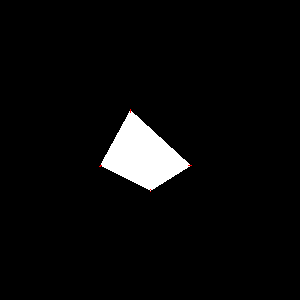

In [56]:
print(cl)
cv2_imshow(oi)

In [57]:
print(c1)


[[130, 109, 211412531.25], [130, 110, 1057062656.25], [130, 111, 1321328320.3125], [130, 112, 264265664.0625], [100, 165, 1004209523.4375], [101, 165, 1057062656.25], [188, 165, 264265664.0625], [189, 165, 1321328320.3125], [190, 165, 1057062656.25], [191, 165, 211412531.25], [99, 166, 52853132.8125], [100, 166, 211412531.25], [150, 189, 52853132.8125], [150, 191, 211412531.25]]


[<KeyPoint 0x7f38ec5837b0>, <KeyPoint 0x7f38ec583420>, <KeyPoint 0x7f38ec583840>, <KeyPoint 0x7f38ec583030>, <KeyPoint 0x7f38ec583990>, <KeyPoint 0x7f38ec5838d0>, <KeyPoint 0x7f38ec583060>, <KeyPoint 0x7f38ec583960>, <KeyPoint 0x7f38ec5832d0>, <KeyPoint 0x7f38ec583ab0>, <KeyPoint 0x7f38ec583f90>, <KeyPoint 0x7f38ec583f60>, <KeyPoint 0x7f38ec583630>, <KeyPoint 0x7f38ec583bd0>, <KeyPoint 0x7f38ec583a20>, <KeyPoint 0x7f38ec583480>, <KeyPoint 0x7f38ec583d50>, <KeyPoint 0x7f38ec583d20>, <KeyPoint 0x7f38ec583660>, <KeyPoint 0x7f38ec583ed0>, <KeyPoint 0x7f38ec5837e0>, <KeyPoint 0x7f38ec583300>, <KeyPoint 0x7f38ec583a50>, <KeyPoint 0x7f38ec5836c0>, <KeyPoint 0x7f38ec5834b0>, <KeyPoint 0x7f38ec583c30>, <KeyPoint 0x7f38ec583120>, <KeyPoint 0x7f38ec583db0>, <KeyPoint 0x7f38ec583a80>, <KeyPoint 0x7f38eb679a80>, <KeyPoint 0x7f38eb679180>, <KeyPoint 0x7f38eb6796c0>, <KeyPoint 0x7f38eb679360>, <KeyPoint 0x7f38eb6792d0>, <KeyPoint 0x7f38eb679f00>, <KeyPoint 0x7f38eb679330>, <KeyPoint 0x7f38eb6792a0>, 

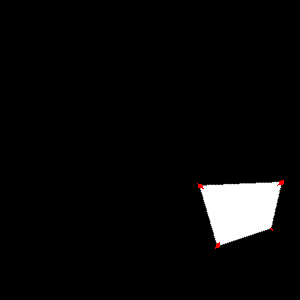

In [58]:
dy2,dx2,c2,cl1,oi1=find_harris_corners(dst1, 0.145, 5, 0)
print(cl1)
cv2_imshow(oi1)

[[281, 180, 155400731.94093752], [282, 180, 246597601.78093755], [283, 180, 64164990.72625002], [279, 181, 344510571.9034376], [280, 181, 1598238741.3284378], [281, 181, 1344657727.6484377], [282, 181, 911902029.6484375], [283, 181, 216814379.08249998], [279, 182, 2157868725.3175], [280, 182, 3152252307.48625], [281, 182, 2449981661.41375], [282, 182, 1471710975.61375], [283, 182, 304821457.9034376], [197, 183, 3247732.2734375], [279, 183, 3996228737.553438], [280, 183, 4436500933.795], [281, 183, 3245628673.1434374], [282, 183, 1712159979.8200002], [283, 183, 212501403.3359375], [198, 184, 217828750.63093752], [199, 184, 470763906.8750001], [200, 184, 628963558.1137502], [201, 184, 349016894.5925002], [278, 184, 1101095427.9934375], [279, 184, 2867121816.01375], [280, 184, 2245221937.8762503], [281, 184, 1420759862.2184381], [282, 184, 302909769.4534378], [198, 185, 615605499.1925001], [199, 185, 1287645589.4934375], [200, 185, 1817401616.540938], [201, 185, 1802000186.023438], [277, 

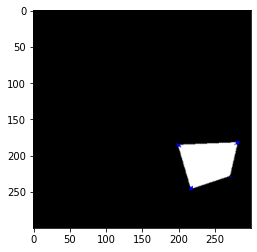

In [59]:
plt.imshow(oi1)
print(c2)

In [60]:
#function for descriptor
def discriptors(gx,gy,keypoint):
    
    mag = np.zeros(gx.shape)
    angle = np.zeros(gx.shape)
    angle = np.degrees(np.arctan2(gy,gx))%360
    mag = ((gx*gx)+(gy*gy))**.5
    binarray=[]

    for ikp in keypoint:
        try:
            x,y = ikp.pt
            x = int(x)
            y = int(y)
 # 16 * 16 window of angle
            win = angle[y-8:y+8, x-8:x+8]
 # 16 * 16 window of magnitude
            win2 = mag[y-8:y+8, x-8:x+8]
            if len(win)<16:
                continue
            x1 = -2
            y1 = -2
            bindup = []
 #Getting 16 4*4 windows
            for x in range(0,4):
                x1 = -2
                y1 = y1+4
                for y in range(0,4):
                    x1 = x1+4
                    rsmall = win[y1-2:y1+2, x1-2:x1+2] #4*4 window of magnitude and angle
                    rsmall2 = win2[y1-2:y1+2, x1-2:x1+2]
                    bi = dict()
                    for k in range(0,8):
                        bi[k] = 0
                    for i in range(0,4):
                        for j in range(0,4):
 # getting the magnitude for each pixel and according to the angle distribute portions of magnitude between multiple bins                           
                            no=np.uint8(rsmall[i][j]/45)
                            bi[no] = (rsmall2[i][j]/45)*((no*45+45)-rsmall[i][j])
                            if no+1 in bi:
                                bi[no+1] = (rsmall2[i][j]/45)*(rsmall[i][j]-no*45)
                            else:
                                bi[0] = (rsmall2[i][j]/45)*(rsmall[i][j]-no*45)
 # 128 dimensional 16*8 bin
                                
                    bindup.extend(list(bi.values()))

 # Normalising the Histogram
                    
            barr = np.array(bindup,np.float32)
            div = ((barr**2).sum())**.5
 # Clipping the value to .2
            binarray.append(np.clip((barr/div),0,.2))
        
        except:
            continue
    
    return np.array(binarray,np.float32)


In [61]:
des1=discriptors(dx1,dy1,cl)
des2=discriptors(dx2,dy2,cl1)

In [62]:
#Matching the corners of 2 quadrilateral 
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
m1=matches
matches = sorted(matches, key = lambda x: x.distance)

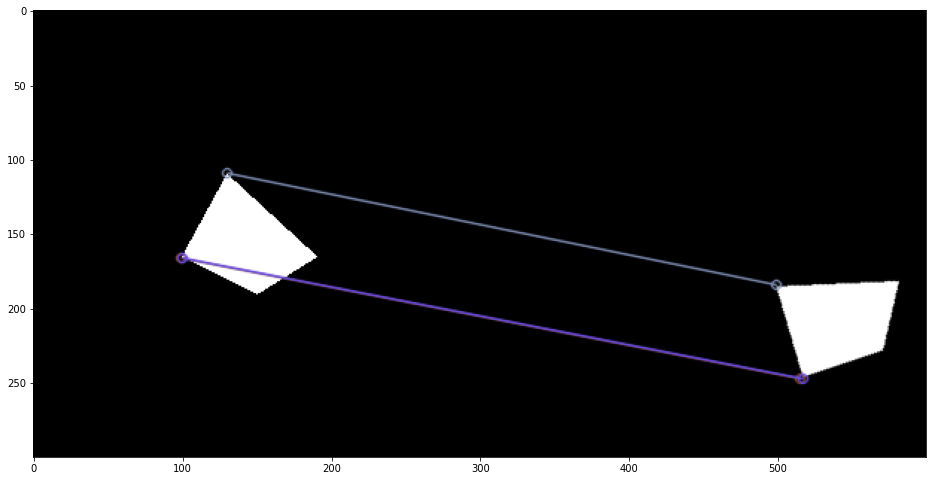

In [77]:
#Drawing the matches
from matplotlib import pyplot as plt
img_matches = cv2.drawMatches(my_img, cl, dst1, cl1, matches[:3], dst1, flags=2) # Show top 10 matches
plt.figure(figsize=(16, 16))
#plt.title(type(detector))
plt.imshow(img_matches); plt.show()

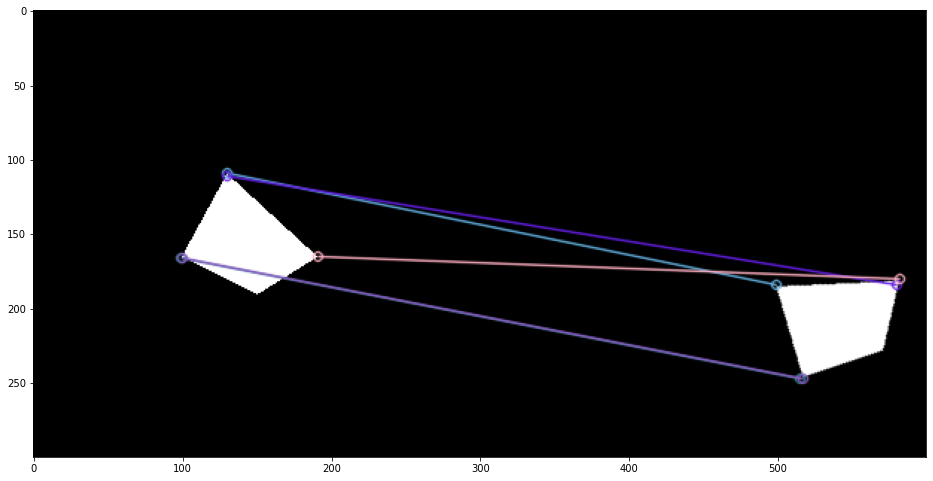

In [64]:
#Drawing the matches
from matplotlib import pyplot as plt
img_matches = cv2.drawMatches(my_img, cl, dst1, cl1, m1[:5], dst1, flags=2) # Show top 10 matches
plt.figure(figsize=(16, 16))
#plt.title(type(detector))
plt.imshow(img_matches); plt.show()

**Getting homography, tx, ty**

I am considering all the points here but 8 is enough for this case 

In [80]:
import math
from math import sqrt
from math import pi

# Initialize lists
list_kp1 = []
list_kp2 = []
matches1=matches[:3]
# For each match...
for mat in matches1:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1,y1) = cl[img1_idx].pt
    (x2,y2) = cl1[img2_idx].pt

    # Append to each list
    list_kp1.append((x1, y1, 1))
    list_kp2.append((x2, y2, 1))

# Only three points were matched using the detector/descriptor combination 
# 
#list_kp1.append((150 , 190, 1))
##list_kp2.append((270 , 228, 1))
#list_kp1.append((190 , 165, 1))
#list_kp2.append((282 , 180, 1))

print("Estimating the rotation and translation parameters")
A = np.asarray(list_kp1)
B = np.asarray(list_kp2)

rows, cols = A.shape

Am = np.mean(A, axis=0)           # centroid of source points
Bm = np.mean(B, axis=0)           # centroid of destination points

M = np.dot((B - Bm).T, (A - Am))  # considering only rotation after repositioning with respect to origin
    
# singular value decomposition
U, S, Vt = np.linalg.svd(M)

# rotation matrix
R = np.dot(U, np.transpose(Vt))
rangle = (180*math.acos(R[0,0]))/pi
print("The rotation angle is  \n",rangle)
print(" and the corresponding matrix: %d\n",R)

# translation vector
L = B.mean(0)  - np.dot(R, A.mean(0))
print("The translation matrix is %d", L)
# RMSE determined by using rigid body model

err = 0
for i in range(A.shape[0]):
    
    Bp = np.dot(R, A[i, :]) + L
    err += np.sum((Bp - B[i, :])**2)

RMSE = np.sqrt(err/rows/3)
print("The margin of error:",RMSE)


Estimating the rotation and translation parameters
The rotation angle is  
 43.23783044667914
 and the corresponding matrix: %d
 [[ 0.72851649  0.68502827  0.        ]
 [-0.68502827  0.72851649  0.        ]
 [ 0.          0.          1.        ]]
The translation matrix is %d [ 29.7402031  194.03284355   0.        ]
The margin of error: 0.3783218039829266
